In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

In [2]:
def load_rrms(filename):
    results = {'ctr':[],'rrms':[]}
    with open(filename,'r') as f:
        while True:
            line = f.readline()
            if not line:
                break
            else:
                if 'RRMS' in line:
                    results['ctr'].append(float(line.split()[1].strip(';')))
                    results['rrms'].append(float(line.split()[4]))
    results = pd.DataFrame(data=results)
    return results

In [3]:
# filename of a_q results
fsmall_rrms_aq = 'qwt_optimization/constraint_deter/SMALL_RRMS_SUMMARY.txt'
flarge_rrms_aq = 'qwt_optimization/constraint_deter/LARGE_RRMS_SUMMARY.txt'
# filename of a_p results
fsmall_rrms_ap = 'pwt_optimization/constraint_deter/SMALL_RRMS_SUMMARY.txt'
flarge_rrms_ap = 'pwt_optimization/constraint_deter/LARGE_RRMS_SUMMARY.txt'

In [4]:
result_small_aq = load_rrms(fsmall_rrms_aq)
result_large_aq = load_rrms(flarge_rrms_aq)

result_small_ap = load_rrms(fsmall_rrms_ap)
result_large_ap = load_rrms(flarge_rrms_ap)

In [7]:
result_small_ap

,ctr,rrms
0,0.00001,0.121269
1,0.00010,0.121503
2,0.00100,0.123720
3,0.00500,0.134202
4,0.01000,0.141459
5,0.05000,0.155999
6,0.10000,0.159476
7,0.50000,0.162821
8,1.00000,0.163289
9,5.00000,0.163674


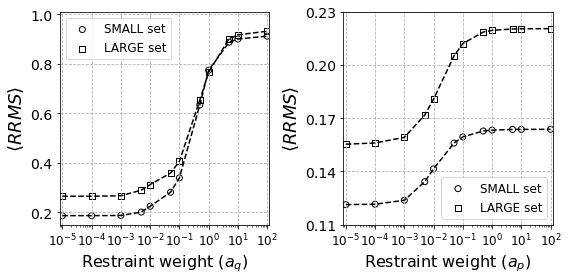

In [26]:
fig = plt.figure(figsize=(8,4))

ax00 =fig.add_subplot(1,2,1)

ax00.scatter(result_small_aq['ctr'],result_small_aq['rrms'],color='none',marker='o',edgecolor='black',label='SMALL set')
ax00.plot(result_small_aq['ctr'],result_small_aq['rrms'],linestyle='--',linewidth=1.5,color='black')

ax00.scatter(result_large_aq['ctr'],result_large_aq['rrms'],color='none',marker='s',edgecolor='black',label='LARGE set')
ax00.plot(result_large_aq['ctr'],result_large_aq['rrms'],linestyle='--',linewidth=1.5,color='black')

ax00.set_xscale('log',base=10)

ax00.xaxis.set_tick_params(labelsize=12)
ax00.yaxis.set_tick_params(labelsize=14)

ax00.set_xlabel('Restraint weight ($a_q$)',fontsize=16,fontfamily='sans-serif')
ax00.set_ylabel(r'$\langle RRMS \rangle$',fontsize=18,fontfamily='sans-serif')

ax00.set_ylim(0.15,1.01)
ax00.yaxis.set_ticks(np.arange(0.2,1.01,0.2))

ax00.set_xlim(8*10**-6,10**2+20)

x_major = LogLocator(base=10, numticks=10)
ax00.xaxis.set_major_locator(x_major)
x_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax00.xaxis.set_minor_locator(x_minor)

ax00.grid(ls='--')
ax00.legend(fontsize=12,loc='best')


ax01 =fig.add_subplot(1,2,2)

ax01.scatter(result_small_ap['ctr'],result_small_ap['rrms'],color='none',marker='o',edgecolor='black',label='SMALL set')
ax01.plot(result_small_ap['ctr'],result_small_ap['rrms'],linestyle='--',linewidth=1.5,color='black')

ax01.scatter(result_large_ap['ctr'],result_large_ap['rrms'],color='none',marker='s',edgecolor='black',label='LARGE set')
ax01.plot(result_large_ap['ctr'],result_large_ap['rrms'],linestyle='--',linewidth=1.5,color='black')

ax01.set_xscale('log',base=10)

ax01.xaxis.set_tick_params(labelsize=12)
ax01.yaxis.set_tick_params(labelsize=14)

ax01.set_xlabel('Restraint weight ($a_p$)',fontsize=16,fontfamily='sans-serif')
ax01.set_ylabel(r'$\langle RRMS \rangle$',fontsize=18,fontfamily='sans-serif')

ax01.set_ylim(0.11,0.23)
ax01.yaxis.set_ticks(np.arange(0.11,0.231,0.03))

ax01.set_xlim(8*10**-6,10**2+20)

x_major = LogLocator(base=10, numticks=10)
ax01.xaxis.set_major_locator(x_major)
x_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax01.xaxis.set_minor_locator(x_minor)

ax01.grid(ls='--')

ax01.legend(fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)

plt.savefig('restraint_weight_opt.png',dpi=800,bbox_inches='tight')